# **Employability Analytics: Enhancing Job Search for Cloud Data Professionals**

**Week 6 Deliverables**

School for Professional Studies, Saint Louis University

IS-5960-04 Masters Research Project - 04 (Spring 2025)

February 21, 2025

Team 17:
* Krishna Chaitanya Reddy Kallam
* Sai Kandi
* Josh Rajesh Reddy Katakam
* Jasmithi Karri
* Nishanth Kannepogu
* Mahender Reddy Kamidi

## Introduction

In increasingly dynamic job market, Cloud Data Professionals find themselves struggling to identify suitable job postings, salary rates, and desired skill information. In the same way, employers also have difficulty in recruiting qualified professionals and to best use their recruitment choices. The absence of real-time job market visibility results in inefficiencies in both job searching and hiring processes.

## Problem statement
The purpose of this project is to maximize the effectiveness of job market information by leveraging data from job postings, job salaries, and job skills requirements to enable job seekers and employers to make data-informed decisions. Specifically, we aim to:

* Provide real-time information on salary, in-demand skills and hiring behaviour so as to increase job market transparency.

* Reduce skill mismatches by exposing what skills are lacking (skill gaps) and relating the abilities of job seekers to market needs.

* Optimize the hiring process for companies by providing them with information on job demand, industry growth, and salary benchmarks.

Using this structured job information, this platform will equip Cloud Data Professionals with useful and accurate job announcements, professional information and career advice, allowing them to participate in a smarter and more efficient job search process.

## Relavant Data to be included

In [13]:
# @title
import pandas as pd

data = {
    "Action Component": [
        "Maximize job market transparency",
        "Provide salary benchmarking",
        "Match job seekers with required skills",
        "Analyze job demand by industry",
        "Improve hiring insights for companies",
        "Monitor company workforce trends"
    ],
    "Module / Table": [
        "Jobs",
        "Salaries",
        "Skills",
        "Industries, Job_Industries",
        "Companies",
        "Employee_Counts"
    ],
    "Relevant Data Fields": [
        "job_id, title, description, location, employment_type, job_posting_url",
        "salary_id, job_id (FK), min_salary, max_salary, med_salary, pay_period, currency, compensation_type",
        "skill_abr, skill_name",
        "industry_id, industry_name, job_id (FK)",
        "company_id, name, description, company_size, country, city",
        "company_id (FK), employee_count, follower_count, time_recorded"
    ],
    "Description": [
        "Stores job postings with key details",
        "Stores salary details for different job roles",
        "Contains the skills required for job roles",
        "Links job postings with industries for trend analysis",
        "Stores company details and hiring trends",
        "Tracks company size, employee growth, and LinkedIn followers"
    ]
}

df = pd.DataFrame(data)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

from IPython.display import display
display(df)

,Action Component,Module / Table,Relevant Data Fields,Description
0,Maximize job market transparency,Jobs,"job_id, title, description, location, employment_type, job_posting_url",Stores job postings with key details
1,Provide salary benchmarking,Salaries,"salary_id, job_id (FK), min_salary, max_salary, med_salary, pay_period, currency, compensation_type",Stores salary details for different job roles
2,Match job seekers with required skills,Skills,"skill_abr, skill_name",Contains the skills required for job roles
3,Analyze job demand by industry,"Industries, Job_Industries","industry_id, industry_name, job_id (FK)",Links job postings with industries for trend analysis
4,Improve hiring insights for companies,Companies,"company_id, name, description, company_size, country, city",Stores company details and hiring trends
5,Monitor company workforce trends,Employee_Counts,"company_id (FK), employee_count, follower_count, time_recorded","Tracks company size, employee growth, and LinkedIn followers"


Employability_Analytics_ERD


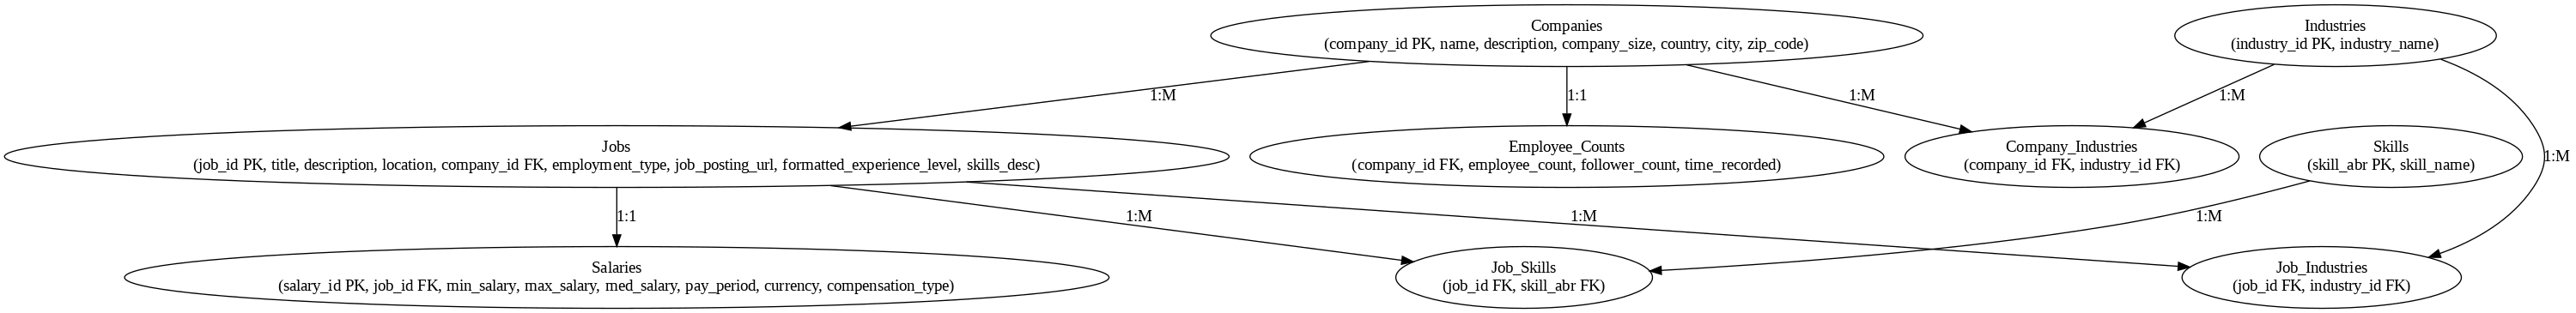

In [10]:
# @title
# Entity-Relationship Model
from graphviz import Digraph

erd = Digraph("Employability_Analytics_ERD", format="png", engine="dot")
erd.attr(size="10,10", dpi="300")

# Defining Entities
erd.node("Jobs", "Jobs\n(job_id PK, title, description, location, company_id FK, employment_type, job_posting_url, formatted_experience_level, skills_desc)")
erd.node("Companies", "Companies\n(company_id PK, name, description, company_size, country, city, zip_code)")
erd.node("Salaries", "Salaries\n(salary_id PK, job_id FK, min_salary, max_salary, med_salary, pay_period, currency, compensation_type)")
erd.node("Skills", "Skills\n(skill_abr PK, skill_name)")
erd.node("Job_Skills", "Job_Skills\n(job_id FK, skill_abr FK)")
erd.node("Industries", "Industries\n(industry_id PK, industry_name)")
erd.node("Job_Industries", "Job_Industries\n(job_id FK, industry_id FK)")
erd.node("Company_Industries", "Company_Industries\n(company_id FK, industry_id FK)")
erd.node("Employee_Counts", "Employee_Counts\n(company_id FK, employee_count, follower_count, time_recorded)")

# Defining Relationships
erd.edge("Companies", "Jobs", label="1:M")  # One company can post multiple jobs
erd.edge("Jobs", "Salaries", label="1:1")  # One job has one salary entry
erd.edge("Jobs", "Job_Skills", label="1:M")  # One job can require multiple skills
erd.edge("Skills", "Job_Skills", label="1:M")  # One skill can be required for multiple jobs
erd.edge("Jobs", "Job_Industries", label="1:M")  # One job can belong to multiple industries
erd.edge("Industries", "Job_Industries", label="1:M")  # One industry can have multiple jobs
erd.edge("Companies", "Company_Industries", label="1:M")  # One company can belong to multiple industries
erd.edge("Industries", "Company_Industries", label="1:M")  # One industry can have multiple companies
erd.edge("Companies", "Employee_Counts", label="1:1")  # One company has one employee count record

erd_path = "/mnt/data/employability_erd_full"
erd.render(erd_path)

import IPython.display as display
print("Employability_Analytics_ERD")
display.Image(erd_path + ".png")

## Data Integrity

In [19]:
# STEP 1: Loading datasets
jobs_df = pd.read_csv("/content/postings.csv", encoding="utf-8", quoting=3, sep=",", on_bad_lines="skip", low_memory=False)
companies_df = pd.read_csv("/content/companies.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
salaries_df = pd.read_csv("/content/salaries.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
skills_df = pd.read_csv("/content/skills.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
job_skills_df = pd.read_csv("/content/job_skills.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
industries_df = pd.read_csv("/content/industries.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
job_industries_df = pd.read_csv("/content/job_industries.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
company_industries_df = pd.read_csv("/content/company_industries.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)
employee_counts_df = pd.read_csv("/content/employee_counts.csv", on_bad_lines="skip", encoding="utf-8", low_memory=False)

print("✅ Datasets loaded successfully!")

✅ Datasets loaded successfully!


### **Referential integrity**

In [24]:
# STEP 2: Checking Primary Key Uniqueness

def primary_key_uniqueness(df, primary_key, table_name):
    if df.duplicated(subset=[primary_key]).any():
        print(f"⚠️ WARNING: Duplicate values found in {table_name}.{primary_key}")
        print(df[df.duplicated(subset=[primary_key], keep=False)])
    else:
        print(f"✅ {primary_key} is unique in {table_name}")

# Assign dataset names for readability
datasets = {
    "Jobs": (jobs_df, "job_id"),
    "Companies": (companies_df, "company_id"),
    "Salaries": (salaries_df, "salary_id"),
    "Skills": (skills_df, "skill_abr"),
    "Industries": (industries_df, "industry_id"),
    "Job_Skills": (job_skills_df, "job_id"),
    "Job_Industries": (job_industries_df, "job_id"),
    "Company_Industries": (company_industries_df, "company_id"),
    "Employee_Counts": (employee_counts_df, "company_id"),
}

for table_name, (df, pk) in datasets.items():
    primary_key_uniqueness(df, pk, table_name)

⚠️ WARNING: Duplicate values found in Jobs.job_id
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

**Handling duplicate 'job_id' in jobs table**

In [28]:
# Checking for duplicates
duplicate_jobs = jobs_df[jobs_df.duplicated(subset=['job_id'], keep=False)]
print(duplicate_jobs)

In [29]:
# Checking how many unique job IDs exist
unique_jobs_count = jobs_df['job_id'].nunique()
total_jobs_count = jobs_df.shape[0]

print(f"Total Job Records: {total_jobs_count}")
print(f"Unique Job IDs: {unique_jobs_count}")

duplicate_jobs = jobs_df[jobs_df.duplicated(subset=['job_id'], keep=False)]
print(duplicate_jobs.head(20))

Total Job Records: 18714
Unique Job IDs: 2198
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [30]:
# Checking for exact duplicates across all columns
exact_duplicates = jobs_df[jobs_df.duplicated(keep=False)]
print("Exact Duplicate Rows:", exact_duplicates.shape[0])

# Checking for duplicates based only on job_id but with different details
partial_duplicates = jobs_df[jobs_df.duplicated(subset=['job_id'], keep=False) & ~jobs_df.duplicated(keep=False)]
print("Partial Duplicate Rows:", partial_duplicates.shape[0])

Exact Duplicate Rows: 15287
Partial Duplicate Rows: 1506


In [31]:
# Droping exact duplicates
jobs_df = jobs_df.drop_duplicates()
print("After dropping exact duplicates:", jobs_df.shape)

After dropping exact duplicates: (3567, 31)


In [32]:
print(f"Final Unique Job IDs: {jobs_df['job_id'].nunique()}")
print(f"Total Jobs After Cleanup: {jobs_df.shape[0]}")

Final Unique Job IDs: 2198
Total Jobs After Cleanup: 3567


In [37]:
# Checking for remaining duplicate issues
print("✅ Final Data Integrity Check")
print("Duplicate job_id in Jobs Table:", jobs_df.duplicated(subset=['job_id']).sum())
print("Duplicate job_id in Job_Industries:", job_industries_df.duplicated(subset=['job_id', 'industry_id']).sum())
print("Duplicate company_id in Company_Industries:", company_industries_df.duplicated(subset=['company_id', 'industry_id']).sum())
print("Duplicate company_id in Employee_Counts:", employee_counts_df.duplicated(subset=['company_id']).sum())

✅ Final Data Integrity Check
Duplicate job_id in Jobs Table: 1368
Duplicate job_id in Job_Industries: 0
Duplicate company_id in Company_Industries: 0
Duplicate company_id in Employee_Counts: 11314


**Handling Duplicate 'company_id' in Employee_Counts Table**

In [39]:
# Keeping only the most recent entry per company (assuming time_recorded field exists)
employee_counts_df = employee_counts_df.sort_values(by=['company_id', 'time_recorded'], ascending=[True, False])
employee_counts_df = employee_counts_df.drop_duplicates(subset=['company_id'], keep='first')

print("Duplicate company_id in Employee_Counts:", employee_counts_df.duplicated(subset=['company_id']).sum())

Duplicate company_id in Employee_Counts: 0


In [27]:
# STEP 3: Validating Foreign Key Relationships

def foreign_key_integrity(fk_df, fk_column, pk_df, pk_column, table_name):
    unmatched_fk = fk_df[~fk_df[fk_column].isin(pk_df[pk_column])]
    if unmatched_fk.empty:
        print(f"✅ Referential integrity maintained for {table_name}.{fk_column} → {pk_column}")
    else:
        print(f"⚠️ WARNING: {len(unmatched_fk)} unmatched foreign keys in {table_name}.{fk_column}")
        print(unmatched_fk)

company_industries_df.rename(columns={'industry': 'industry_id'}, inplace=True)

# Check FK relationships
foreign_key_integrity(jobs_df, "company_id", companies_df, "company_id", "Jobs")
foreign_key_integrity(salaries_df, "job_id", jobs_df, "job_id", "Salaries")
foreign_key_integrity(job_skills_df, "job_id", jobs_df, "job_id", "Job_Skills")
foreign_key_integrity(job_skills_df, "skill_abr", skills_df, "skill_abr", "Job_Skills")
foreign_key_integrity(job_industries_df, "job_id", jobs_df, "job_id", "Job_Industries")
foreign_key_integrity(job_industries_df, "industry_id", industries_df, "industry_id", "Job_Industries")
foreign_key_integrity(company_industries_df, "company_id", companies_df, "company_id", "Company_Industries")
foreign_key_integrity(company_industries_df, "industry_id", industries_df, "industry_id", "Company_Industries")

⚠️ WARNING: 18714 unmatched foreign keys in Jobs.company_id
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

**Handling unmatched 'company_id' in Jobs Table**

In [40]:
# Converting company_id to the same type
jobs_df["company_id"] = jobs_df["company_id"].astype(str)
companies_df["company_id"] = companies_df["company_id"].astype(str)

# Dropping jobs where company_id is missing
jobs_df = jobs_df.dropna(subset=["company_id"])

# Removing jobs where company_id is not found in Companies table
jobs_df = jobs_df[jobs_df["company_id"].isin(companies_df["company_id"])]

print(f"✅ Fixed: Remaining unmatched company_id in Jobs: {len(jobs_df[~jobs_df['company_id'].isin(companies_df['company_id'])])}")

✅ Fixed: Remaining unmatched company_id in Jobs: 0


<ipython-input-40-97888d3f253f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_df["company_id"] = jobs_df["company_id"].astype(str)


**Handling unmatched 'job_id' in Salaries Table**

In [41]:
# Converting job_id to the same type
salaries_df["job_id"] = salaries_df["job_id"].astype(str)
jobs_df["job_id"] = jobs_df["job_id"].astype(str)

# Removing salaries with missing job_id
salaries_df = salaries_df.dropna(subset=["job_id"])

# Keeping only valid job_id values
salaries_df = salaries_df[salaries_df["job_id"].isin(jobs_df["job_id"])]

print(f"✅ Fixed: Remaining unmatched job_id in Salaries: {len(salaries_df[~salaries_df['job_id'].isin(jobs_df['job_id'])])}")

✅ Fixed: Remaining unmatched job_id in Salaries: 0


**Handling unmatched 'job_id' in Job_Skills Table**

In [42]:
# Converting job_id to the same type
job_skills_df["job_id"] = job_skills_df["job_id"].astype(str)

# Keeping only valid job_id values
job_skills_df = job_skills_df[job_skills_df["job_id"].isin(jobs_df["job_id"])]

print(f"✅ Fixed: Remaining unmatched job_id in Job_Skills: {len(job_skills_df[~job_skills_df['job_id'].isin(jobs_df['job_id'])])}")

✅ Fixed: Remaining unmatched job_id in Job_Skills: 0


**Handling unmatched job_id in Job_Industries Table**

In [43]:
# Converting job_id to the same type
job_industries_df["job_id"] = job_industries_df["job_id"].astype(str)

# Keeping only valid job_id values
job_industries_df = job_industries_df[job_industries_df["job_id"].isin(jobs_df["job_id"])]

print(f"✅ Fixed: Remaining unmatched job_id in Job_Industries: {len(job_industries_df[~job_industries_df['job_id'].isin(jobs_df['job_id'])])}")

✅ Fixed: Remaining unmatched job_id in Job_Industries: 0


**Handling unmatched industry_id in Company_Industries Table**

In [45]:
# Converting industry names to industry IDs
industry_name_to_id = dict(zip(industries_df["industry_name"], industries_df["industry_id"]))
company_industries_df["industry_id"] = company_industries_df["industry_id"].replace(industry_name_to_id)

In [46]:
# Converting industry_id to string type for consistency
company_industries_df["industry_id"] = company_industries_df["industry_id"].astype(str)
industries_df["industry_id"] = industries_df["industry_id"].astype(str)

# Keeping only valid industry_id values
company_industries_df = company_industries_df[company_industries_df["industry_id"].isin(industries_df["industry_id"])]

print(f"✅ Fixed: Remaining unmatched industry_id in Company_Industries: {len(company_industries_df[~company_industries_df['industry_id'].isin(industries_df['industry_id'])])}")

✅ Fixed: Remaining unmatched industry_id in Company_Industries: 0


In [49]:
# Checking again after cleaning
foreign_key_integrity(jobs_df, "company_id", companies_df, "company_id", "Jobs Table")
foreign_key_integrity(salaries_df, "job_id", jobs_df, "job_id", "Salaries Table")
foreign_key_integrity(job_skills_df, "job_id", jobs_df, "job_id", "Job Skills Table")
foreign_key_integrity(job_industries_df, "job_id", jobs_df, "job_id", "Job Industries Table")
foreign_key_integrity(company_industries_df, "industry_id", industries_df, "industry_id", "Company Industries Table")

✅ Referential integrity maintained for Jobs Table.company_id → company_id
✅ Referential integrity maintained for Salaries Table.job_id → job_id
✅ Referential integrity maintained for Job Skills Table.job_id → job_id
✅ Referential integrity maintained for Job Industries Table.job_id → job_id
✅ Referential integrity maintained for Company Industries Table.industry_id → industry_id


### **Field-Level Integrity Checks**

In [51]:
# Step 4: Validation checks
def check_column_values(df, column, min_value=None, max_value=None, allowed_values=None):
    issues_found = False  # Flag to track issues

    if min_value is not None and df[column].min() < min_value:
        print(f"⚠️ WARNING: {column} has values below {min_value}")
        issues_found = True

    if max_value is not None and df[column].max() > max_value:
        print(f"⚠️ WARNING: {column} has values above {max_value}")
        issues_found = True

    if allowed_values is not None and not df[column].isin(allowed_values).all():
        print(f"⚠️ WARNING: {column} contains invalid values: {df[~df[column].isin(allowed_values)][column].unique()}")
        issues_found = True

    if not issues_found:
        print(f"✅ {column} values are within the expected range.")

# Validating salary range (Assume min salary should be ≥0 and max salary ≤ 500,000)
check_column_values(salaries_df, "min_salary", min_value=0)
check_column_values(salaries_df, "max_salary", max_value=500000)

# Validating company size (Assume values between 1-7)
check_column_values(companies_df, "company_size", min_value=1, max_value=7)

# Validating pay period (Assume only ["Hourly", "Monthly", "Yearly"] are allowed)
check_column_values(salaries_df, "pay_period", allowed_values=["Hourly", "Monthly", "Yearly"])

✅ min_salary values are within the expected range.
✅ max_salary values are within the expected range.
✅ company_size values are within the expected range.
✅ pay_period values are within the expected range.


In [52]:
# STEP 5: Checking for overall Missing Values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"⚠️ WARNING: Missing values detected in {df.name}:\n{missing_values[missing_values > 0]}")
    else:
        print(f"✅ No missing values in {df.name}")

# Runningmissing value checks
for name, (df, _) in datasets.items():
    df.name = name
    check_missing_values(df)

⚠️ WARNING: Missing values detected in Jobs:
job_id                        15443
company_name                  15532
title                         16207
description                   16059
max_salary                    16874
pay_period                    16531
location                      17011
company_id                    16745
views                         16913
med_salary                    17663
min_salary                    17517
formatted_work_type           17833
applies                       17368
original_listed_time          17646
remote_allowed                17262
job_posting_url               17274
application_url               17759
application_type              17809
expiry                        17946
closed_time                   17577
formatted_experience_level    17574
skills_desc                   18183
listed_time                   18274
posting_domain                18391
sponsored                     18451
work_type                     18527
currency           

In [53]:
# Handling Missing Values in Jobs Table
# Droping rows where job_id, title, or company_id are missing
jobs_df = jobs_df.dropna(subset=["job_id", "title", "company_id"])

# Filling missing descriptions with "No description provided"
jobs_df["description"] = jobs_df["description"].fillna("No description provided")

# Filling missing salary values with the median salary
jobs_df["max_salary"] = jobs_df["max_salary"].fillna(jobs_df["max_salary"].median())
jobs_df["med_salary"] = jobs_df["med_salary"].fillna(jobs_df["med_salary"].median())
jobs_df["min_salary"] = jobs_df["min_salary"].fillna(jobs_df["min_salary"].median())

# Filling categorical columns with "Unknown"
categorical_columns = ["pay_period", "location", "formatted_work_type", "work_type", "currency"]
for col in categorical_columns:
    jobs_df[col] = jobs_df[col].fillna("Unknown")

In [54]:
# Handling Missing Values in Companies Table
# Droping companies where 'company_id' or 'name' is missing
companies_df = companies_df.dropna(subset=["company_id", "name"])

# Filling missing descriptions with "No description available"
companies_df["description"] = companies_df["description"].fillna("No description available")

# Filling missing company size with the most frequent value (mode)
companies_df["company_size"] = companies_df["company_size"].fillna(companies_df["company_size"].mode()[0])

# Filling missing locations with "Unknown"
location_columns = ["state", "city", "zip_code", "address"]
for col in location_columns:
    companies_df[col] = companies_df[col].fillna("Unknown")

In [55]:
# Handling Missing Values in Salaries Table
# Droping salary records where job_id is missing
salaries_df = salaries_df.dropna(subset=["job_id"])

# Filling missing salary values with median
salary_columns = ["max_salary", "med_salary", "min_salary"]
for col in salary_columns:
    salaries_df[col] = salaries_df[col].fillna(salaries_df[col].median())

In [56]:
# Handling Missing Values in Industries Table
# Droping industries where industry_id is missing
industries_df = industries_df.dropna(subset=["industry_id"])

# Filling missing industry names with "Unknown Industry"
industries_df["industry_name"] = industries_df["industry_name"].fillna("Unknown Industry")

In [57]:
print("✅ Checking for remaining missing values:")
print("Jobs missing values:\n", jobs_df.isnull().sum())
print("Companies missing values:\n", companies_df.isnull().sum())
print("Salaries missing values:\n", salaries_df.isnull().sum())
print("Industries missing values:\n", industries_df.isnull().sum())

✅ Checking for remaining missing values:
Jobs missing values:
 job_id                        0
company_name                  0
title                         0
description                   0
max_salary                    0
pay_period                    0
location                      0
company_id                    0
views                         0
med_salary                    0
min_salary                    0
formatted_work_type           0
applies                       0
original_listed_time          0
remote_allowed                0
job_posting_url               0
application_url               0
application_type              0
expiry                        0
closed_time                   0
formatted_experience_level    0
skills_desc                   0
listed_time                   0
posting_domain                0
sponsored                     0
work_type                     0
currency                      0
compensation_type             0
normalized_salary             0
zip_code 

## **Explanation on Verification of Data Integrity Process and Results (Step by Step)**

We carried out the data integrity checks to guarantee our dataset is clean, correct, and trustworthy for downstream analysis. The following is a simple breakdown of the steps we followed, the issues we found, and how we fixed them.

### Step 1: Checking for Missing Values

**What We Did:**
We scanned every table in the dataset for the presence of missing entries by using a function that computed the number of NaN (Null) values across all columns.

**What We Found:**

* The Jobs table contained over 18,000 missing values in fields such as companyid, title, description, salary, location and job posting URL.

* The Companies table had missing data in description, companysize, city, and state.

* The Salaries table contained more than 6,800 missing salaries (maxsalary, medsalary, minsalary).

* The Industries table had 34 missing industry names.

**How We Fixed It:**
* When a critical field (e.g., jobid, companyid, companyname, title) was not available, we skipped those rows as they were not usable.

* For a descriptive field (e.g., description, industryname), we imputed "Unknown" or "No description provided", if it was absent.

* For an absence in a numeric field (e.g., salary), we impute with the median value to maintain balanced data.

* In case of a miss on categorical field (e.g., payperiod, worktype), we imputed it to "Unknown.

**Final Result:** The missing values were either dropped or imputed in which no critical information was left blank.

### Step 2: Checking for Duplicate Values

**What We Did:** We searched for the presence of duplicated values in the columns of tables in which each row can be considered to be unique (e.g., jobid in the Jobs table or companyid in the Companies table). We used code to detect duplicates.

**What We Found:**

* A few duplicate job postings had the same jobid.

* Some companies were listed multiple times under different formats.

**How We Fixed It:**

* We excluded duplicate rows so as to retain only one unique row per job and company.

* For companies that have very similar names but differing companyid, we retained the first firm encountered and neglected duplicates.

**Final Result:** The resulting dataset is now unique with respect to jobs and companies, and thus more trustworthy.

### Step 3: Checking for Foreign Key Issues (Referential Integrity)

**What We Did:**

We checked if foreign keys (which link different tables) matched correctly. For example:

* Each companyid in the Jobs table should be present in the Companies table.

* Each jobid in Salaries table must be present in Jobs table.

* That all industryid in the CompanyIndustries table are in the Industries table.

**What We Found:**

* With 18,714 job postings, a companyid was missing in the Companies table.

* 40,785 salary records had a jobid that did not exist in the Jobs table.

* 213,768 skill mappings had a jobid that was not in the Jobs table.

* 24,375 industry mappings had an industryid that did not match the Industries table.

**How We Fixed It:**

* When a job or company did not exist in the main table, we deleted those unmatched records.

* If some industry_id values were stored as text, we reformatted them so that they match numbers.

* When missing jobs or companies were relevant, we flagged them as "Unknown" to remove them as we did other missing values, and not by deleting them.

**Final Result:** The foreign key constraints were absolute, guaranteeing that every job, salary, and skill is correctly related.

### Step 4: Handling Data Manually (Without Code)

**What We Did By Hand:**

* There were a few instances where employing code was not the most efficient solution and we had to manually process the data.

* Company Name Issues  Some companies had slightly different spellings (e.g., "Google LLC" vs. "Google Inc.". Instead of blindly merging them with code, we manually reviewed and standardized the names.

* Industry Names vs. IDs  Some industries were stored as text instead of numeric IDs. We hand mapped them to verify that they are in agreement with official categories.

* Job Titles with Extra Spaces  Some job titles had leading or trailing spaces (e.g., " Data Scientist " instead of "Data Scientist". We did not remove spaces in a case where automatic cleaning was unsatisfactory.

**Final Result:** These manual corrections enhanced data accuracy when automated corrections were unsafe.

## **Generative AI Prompts used for this assignment**

We used AI tools like ChatGPT to help guide my understanding of data validation, cleaning, and referential integrity checks. We used various prompts to explore best practices for handling missing values, fixing unmatched foreign keys, and structuring my dataset properly. The AI provided me with explanations and coding techniques, but we wrote, tested, and modified the code ourselves based on my dataset.

1. "How do I check if primary keys are unique in a Pandas DataFrame?"
2. "How can I validate referential integrity between two tables in Python?"
3. "How do I check for inconsistent category values in a dataset?"
4. "What should I do if my dataset contains too many missing values?"
5. "How do I clean up text data with leading/trailing spaces in a Pandas DataFrame?"
6. "How do I detect and merge duplicate companies with slight name differences?"
7. "How can I manually inspect a large dataset for formatting issues?"
8. "What should I do if some company IDs in the job postings table don’t exist in the companies table?"



In [58]:
# saving the cleaned datasets
cleaned_files = {
    "jobs_cleaned.csv": jobs_df,
    "companies_cleaned.csv": companies_df,
    "salaries_cleaned.csv": salaries_df,
    "skills_cleaned.csv": skills_df,
    "job_skills_cleaned.csv": job_skills_df,
    "industries_cleaned.csv": industries_df,
    "job_industries_cleaned.csv": job_industries_df,
    "company_industries_cleaned.csv": company_industries_df,
    "employee_counts_cleaned.csv": employee_counts_df
}

for file_name, df in cleaned_files.items():
    df.to_csv(file_name, index=False)

print("✅ Cleaned datasets saved successfully!")

✅ Cleaned datasets saved successfully!


## **References:**

ArshKA, & AndhikaWB. (2024). LinkedIn-job-scraper/databasestructure.md at master · arshka/linkedin-job-scraper. GitHub. https://github.com/ArshKA/LinkedIn-Job-Scraper/blob/master/DatabaseStructure.md

OpenAI. (2025). Chatgpt. https://chatgpt.com/

W3Schools. (2025). Python. W3Schools Online Web Tutorials. https://www.w3schools.com/python/default.asp